# Managing Health Care Accounts and Billing

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly.offline as pyo 
import plotly.io as pio

In [3]:
df= pd.read_csv("healthcare_dataset.csv")

# PREVIEW OF DATA

In [4]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306          328         Urgent     2024-02-02  Paracetamol   
1    33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2    27955.096079          205      Emergency     2022-10-07      Aspirin   
3    37909.782410          450       Elective     2020-12-18    Ibuprofen   
4    14238.317814          458         Urgent     2022-10-09   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [5]:
df.tail()

Name  Age  Gender Blood Type Medical Condition  \
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission           Doctor                      Hospital  \
55495        2020-08-16    Joshua Jarvis                Jones-Thompson   
55496        2020-01-23  Taylor Sullivan                  Tucker-Moyer   
55497        2020-07-13   Joe Jacobs DVM  and Mahoney Johnson Vasquez,   
55498        2019-05-25   Kimberly Curry      Jackson Todd and Castro,   
55499        2024-04-02    Dennis Warren                Henry Sons and   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
55495         Blue Cross     2650.714952          417       Elective   
55496              Cigna    31457.797307          316       Elective   
55497   UnitedHealthcare    27620.764717          347         Urgent   
55498           Medicare    32451.092358          321       Elective   
55499              Aetna     4010.134172          448         Urgent   

      Discharge Date  Medication Test Results  
55495     2020-09-15  Penicillin     Abnormal  
55496     2020-02-01     Aspirin       Normal  
55497     2020-08-10   Ibuprofen     Abnormal  
55498     2019-05-31   Ibuprofen     Abnormal  
55499     2024-04-29   Ibuprofen     Abnormal

# DATAFRAME BRIEF OVERVIEWE

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [7]:
df.describe()

Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000

In [8]:
df.describe(include= "object").T

count unique            top   freq
Name                55500  49992    DAvId muNoZ      3
Gender              55500      2           Male  27774
Blood Type          55500      8             A-   6969
Medical Condition   55500      6      Arthritis   9308
Date of Admission   55500   1827     2024-03-16     50
Doctor              55500  40341  Michael Smith     27
Hospital            55500  39876      LLC Smith     44
Insurance Provider  55500      5          Cigna  11249
Admission Type      55500      3       Elective  18655
Discharge Date      55500   1856     2020-03-15     53
Medication          55500      5        Lipitor  11140
Test Results        55500      3       Abnormal  18627

# DATA CLEANING

In [9]:
# Identify Missing Values
print(df.isnull().sum())



Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


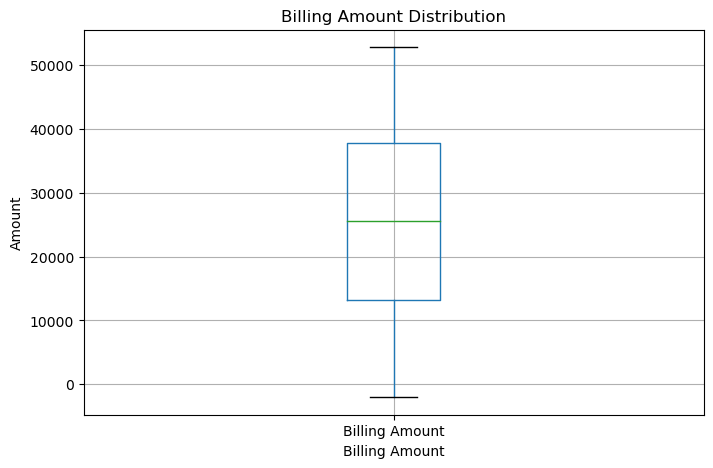

In [10]:
# Analyze Billing Amount Outliers with Boxplots
plt.figure(figsize=(8, 5))
df.boxplot(column='Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Amount')
plt.title('Billing Amount Distribution')
plt.show()

In [11]:
df.shape

(55500, 15)

#  EDA

In [12]:
# Numerical features

df.describe(exclude=['O'])

Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000

In [13]:
# Categorical columns
df['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [14]:
print(df['Blood Type'].value_counts())

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64


In [15]:
print(df['Admission Type'].value_counts())

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64


In [16]:
print(df['Insurance Provider'].value_counts())

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64


In [17]:
print(df['Doctor'].value_counts().sum())

55500


In [18]:
# Test results analysis
print(df['Test Results'].value_counts())

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64


# VISUALIZATION

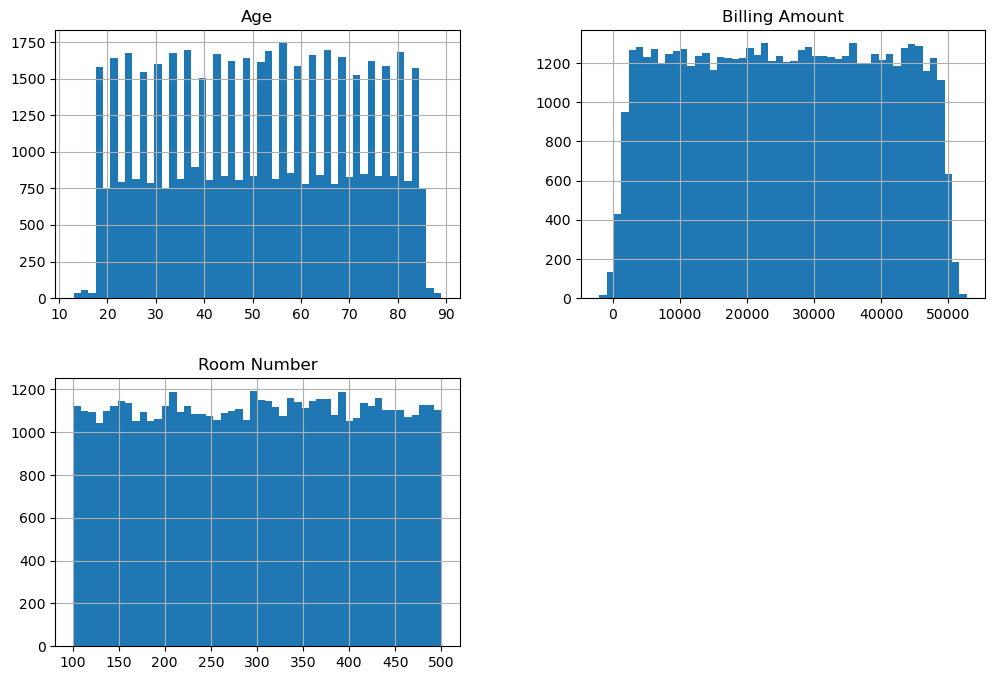

In [19]:
# Histogram

df.hist(bins=50, figsize=(12,8))
plt.show()

In [20]:
# Categorical Features

In [21]:
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

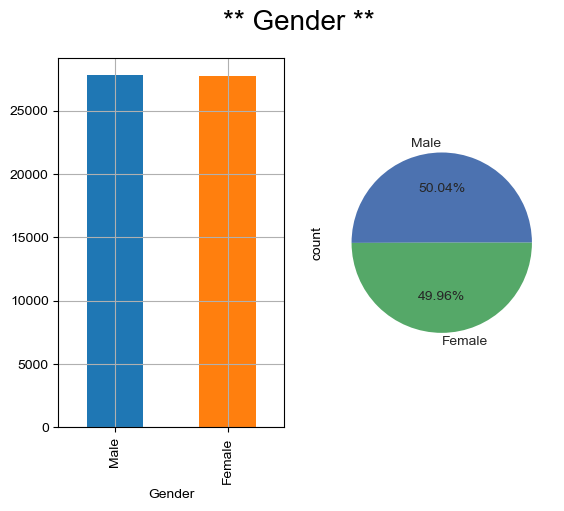

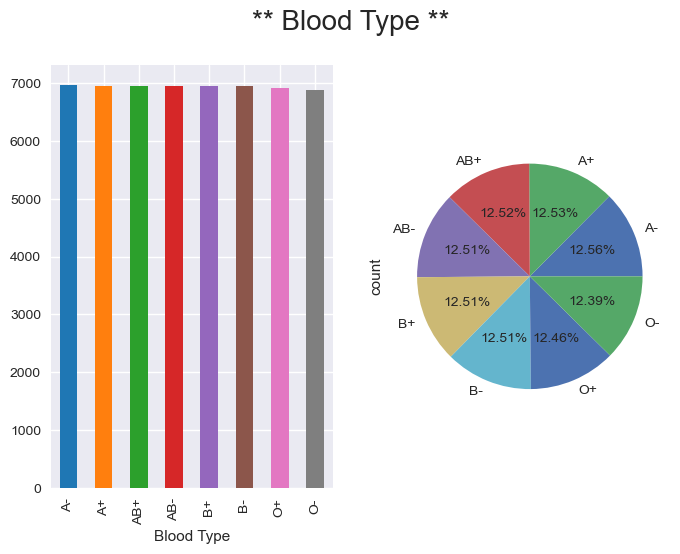

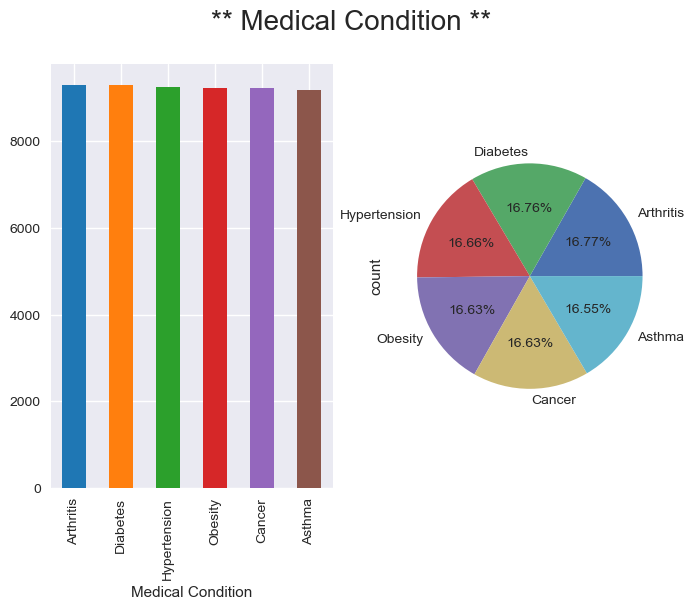

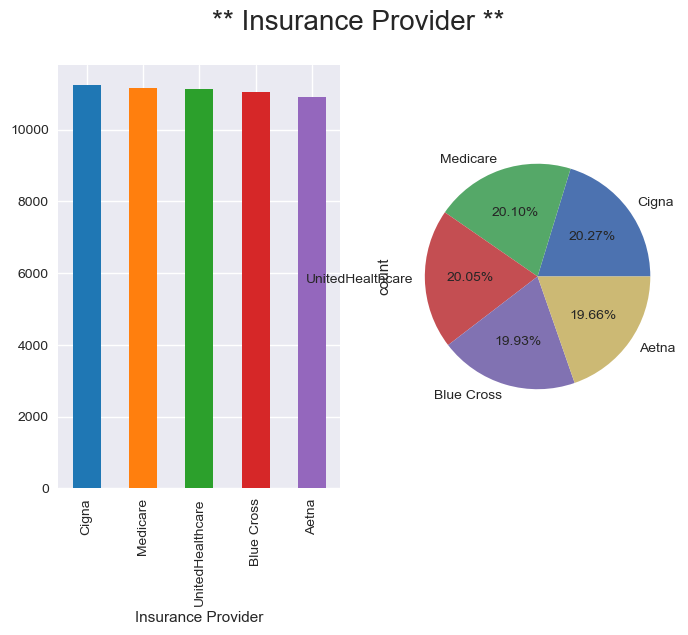

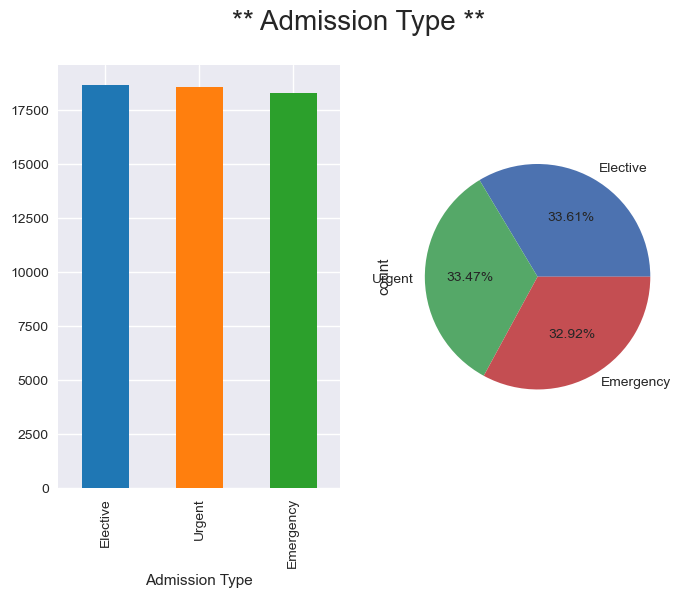

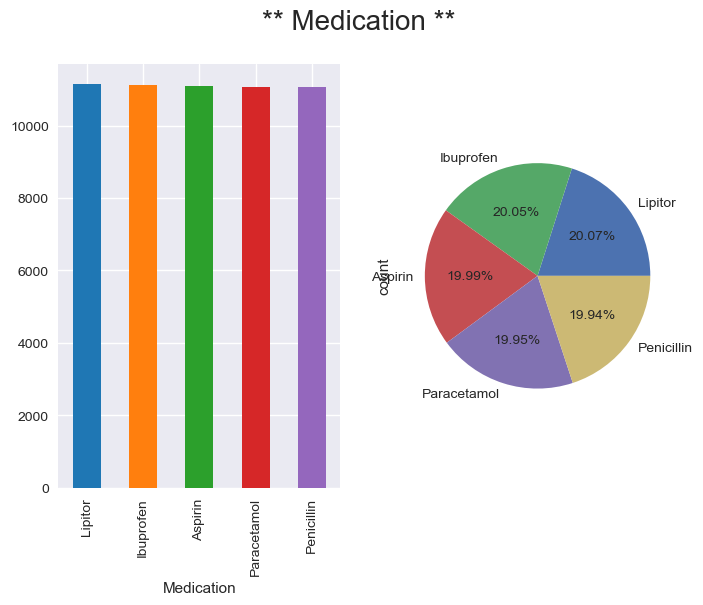

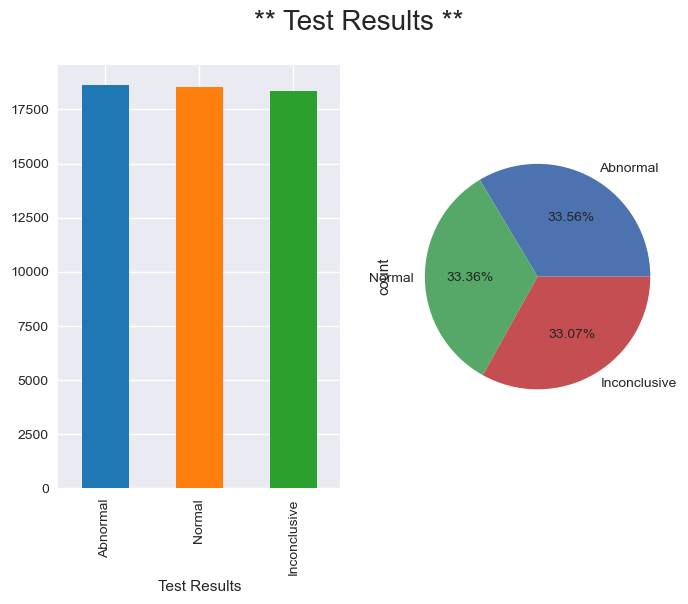

In [22]:
# Categorical Features
for i in cols:
    
    if i == 'Gender':

        fig, ax = plt.subplots(1, 2) 
        fig.suptitle('** Gender **', fontsize=20) 
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()
    
    else:
        fig, ax = plt.subplots(1, 2) 
        fig.suptitle('** ' + i + ' **', fontsize=20) 
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

In [23]:
# Group 'Sex' by 'Medical Condition' and calculate the count for each combination
sex_by_condition = df.groupby(['Medical Condition', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express with different color palettes
fig = px.bar(sex_by_condition, x='Medical Condition', y='Count', color='Gender',
             title='Patient Count by Gender and Medical Condition',
             labels={'Count': 'Patient Count', 'Medical Condition': 'Medical Condition', 'Gender': 'Gender'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [24]:
# Group by 'Blood Type' and 'Medical Condition' and calculate the count for each combination
grouped_df = df.groupby(['Blood Type', 'Medical Condition']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Blood Type', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Blood Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Medical Condition': 'Medical Condition'})
fig.show()

In [25]:
# Group by 'Admission Type' and 'Medical Condition' and calculate the count for each combination
grouped_df = df.groupby(['Admission Type', 'Medical Condition']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Admission Type', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Admission Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Admission Type': 'Admission Type', 'Medical Condition': 'Medical Condition'})
fig.show()

In [26]:
# Group by 'Test Results' and 'Admission Type' and calculate the count for each combination
grouped_df = df.groupby(['Test Results', 'Admission Type']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Test Results', y='Count', color='Admission Type', barmode='group',
             title='Test Results Distribution by Admission Type',
             labels={'Count': 'Count', 'Test Results': 'Test Results', 'Admission Type': 'Admission Type'})
fig.show()

# DISTRIBUTION OF AGE GROUPS

In [27]:
min_age = df['Age'].min()
max_age = df['Age'].max()
print(min_age,",",max_age)

13 , 89


In [28]:
df['Age_Group'] = pd.cut(df['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
                                labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = False)
Age_group = df['Age_Group'].value_counts().sort_values(ascending = False)
Age_group

Age_Group
18-30      9577
51-60      8350
31-40      8179
61-70      8177
41-50      8130
71-80      8072
Over 80    4899
Name: count, dtype: int64

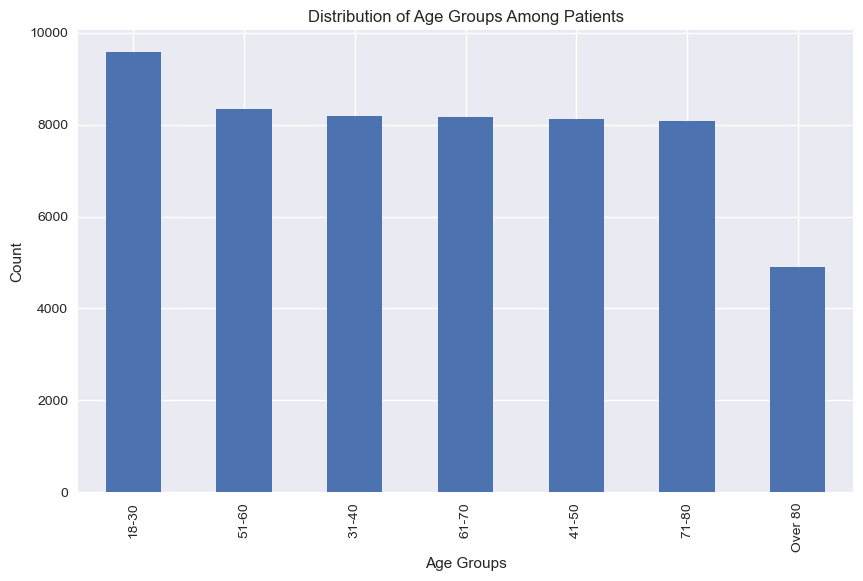

In [29]:
plt.figure(figsize=(10,6))
Age_group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

# BILLING AMOUNT FOR TOP 10 HOSPITAL

In [30]:
# Grouping data by hospital and calculating the average billing amount
top10_hospital_billing = df.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_hospital_billing

Hospital  Billing Amount
0  Johnson PLC    1.084203e+06
1    LLC Smith    1.030190e+06
2    Smith PLC    1.029424e+06
3    Ltd Smith    1.003366e+06
4    Smith Ltd    9.700359e+05
5  Johnson Inc    9.411175e+05
6  Group Smith    9.029758e+05
7    Inc Brown    8.907565e+05
8  LLC Johnson    8.164384e+05
9  Smith Group    8.066313e+05

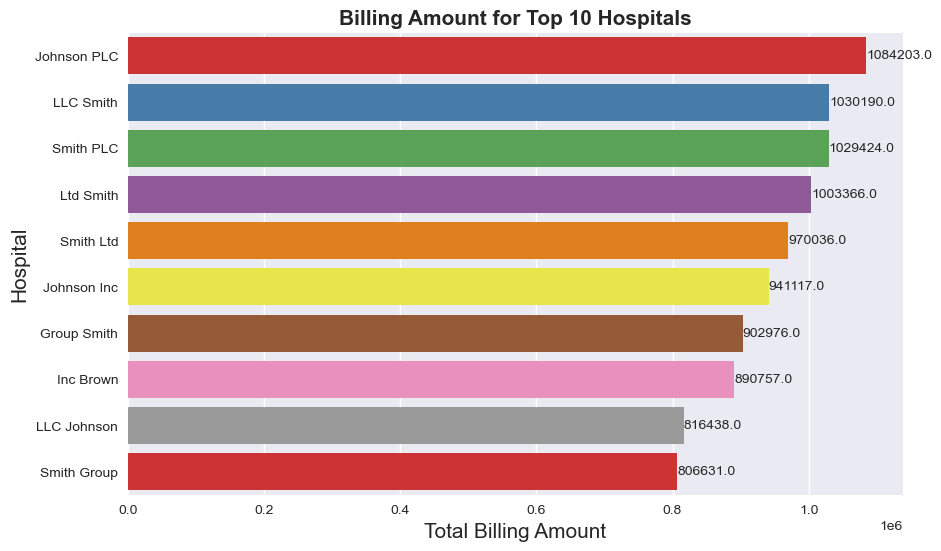

In [31]:
# plot bar graph to find the top 10 hospitals by billing
plt.figure(figsize=(10,6))
sns.barplot(x= top10_hospital_billing['Billing Amount'],
            y= top10_hospital_billing['Hospital'],
            palette="Set1")
for index,value in enumerate(top10_hospital_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Hospital',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Hospitals',fontsize = 15, weight = 'bold')
plt.show()

# TOP 20 DOCTOR BILLING AMOUNT

In [32]:
# Grouping data by doctors and calculating the sum of billing amount
top20_doctors_billing = df.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:20].reset_index()
top20_doctors_billing

Doctor  Billing Amount
0       Michael Smith   784501.843132
1        Robert Smith   634792.990831
2          John Smith   610109.604175
3      Robert Johnson   524193.003178
4         David Smith   473345.609187
5     William Johnson   469198.116030
6        John Johnson   466769.966463
7         James Smith   461817.900317
8     Michael Johnson   460819.038528
9       David Johnson   445605.542275
10      Matthew Smith   421435.166399
11         Lisa Smith   417244.443898
12     Michael Martin   412085.251297
13         Mary Smith   410154.991831
14      Anthony Smith   407449.546582
15     William Miller   399800.994987
16    Elizabeth Smith   399103.025822
17       Daniel Smith   397748.207802
18  Christopher Brown   393923.915162
19        Tammy Smith   381201.876167

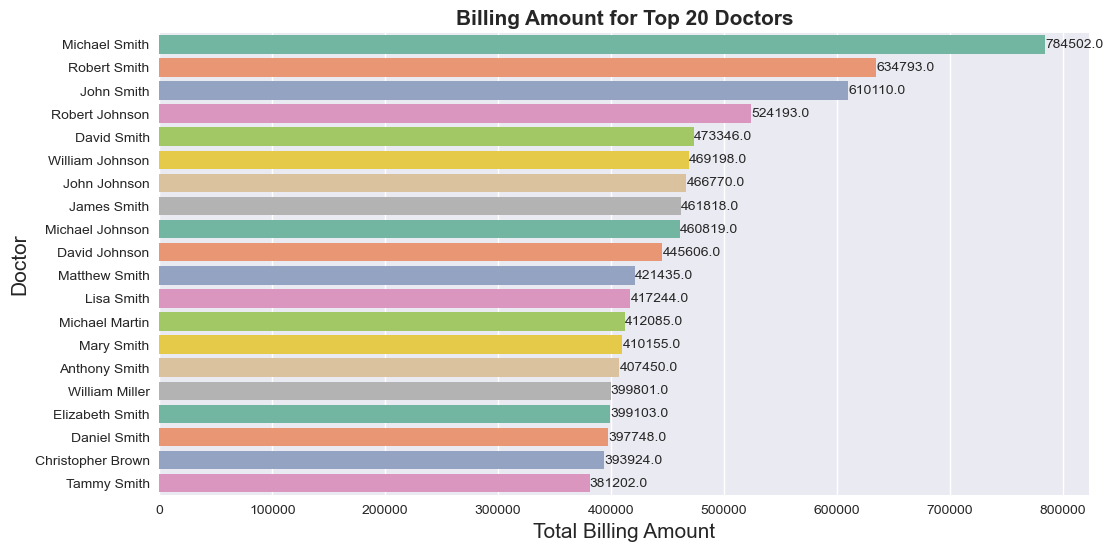

In [33]:
# plot bar graph to find the top 20 doctors by billing
plt.figure(figsize=(12,6))
sns.barplot(x= top20_doctors_billing['Billing Amount'],
            y= top20_doctors_billing['Doctor'],
            palette="Set2")
for index,value in enumerate(top20_doctors_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 20 Doctors',fontsize = 15, weight = 'bold')
plt.show()

In [34]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = df.groupby(['Medical Condition','Gender'])[['Billing Amount']].mean().reset_index()
medical_gender_billing

Medical Condition  Gender  Billing Amount
0          Arthritis  Female    25340.130732
1          Arthritis    Male    25656.700049
2             Asthma  Female    25373.928643
3             Asthma    Male    25892.113179
4             Cancer  Female    25269.057026
5             Cancer    Male    25055.061811
6           Diabetes  Female    25532.993312
7           Diabetes    Male    25743.772533
8       Hypertension  Female    25450.944837
9       Hypertension    Male    25543.037496
10           Obesity  Female    25855.920438
11           Obesity    Male    25755.881195

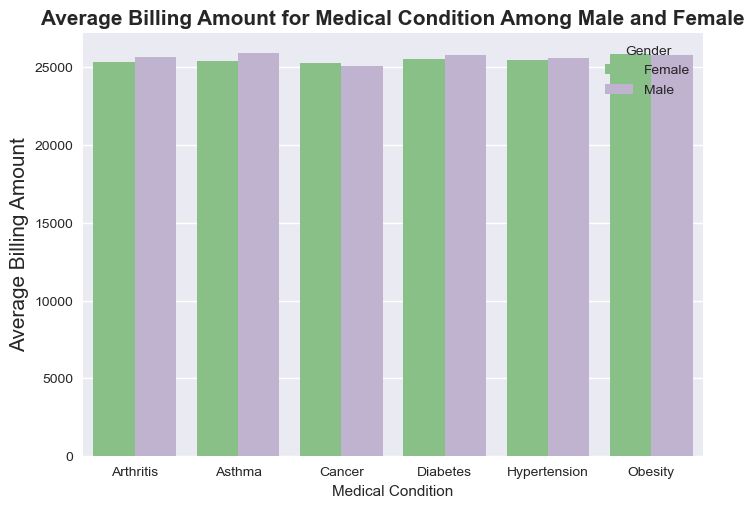

In [35]:
# plot bar graph to find the average billing amount for medical condition among male and female
sns.barplot(x= medical_gender_billing['Medical Condition'],
            y= medical_gender_billing['Billing Amount'],
            hue = medical_gender_billing['Gender'],ci = None,
            palette="Accent")
# Adding labels and title
plt.ylabel('Average Billing Amount',fontsize = 15)
plt.title('Average Billing Amount for Medical Condition Among Male and Female',fontsize = 15, weight = 'bold')
plt.show()

# BILLING

In [36]:
cols = ['Gender','Blood Type', 'Medical Condition','Doctor',
        'Hospital', 'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

In [37]:
# Highest "Features" according to Billing Amount

for i in cols:
    
    if i == 'Gender':

        char_bar = df.groupby(['Gender'])[['Billing Amount']].sum().reset_index()
        char_bar = char_bar.sort_values(by=("Billing Amount"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Gender'], y=top["Billing Amount"]))

        fig.update_layout(title="Highest Gender According to " + 'Billing Amount',
                          xaxis_title='Gender',
                          yaxis_title= "Billing Amount",
                          plot_bgcolor='white', 
                          paper_bgcolor='white',  
                          font=dict(color='black'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

    else:
        char_bar = df.groupby([i])[['Billing Amount']].sum().reset_index()
        char_bar = char_bar.sort_values(by=("Billing Amount"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top['Billing Amount']))

        fig.update_layout(title="Highest " + i + " According to Billing Amount",
                          xaxis_title= i,
                          yaxis_title= "Billing Amount",
                          plot_bgcolor='white', 
                          paper_bgcolor='white',  
                          font=dict(color='black'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

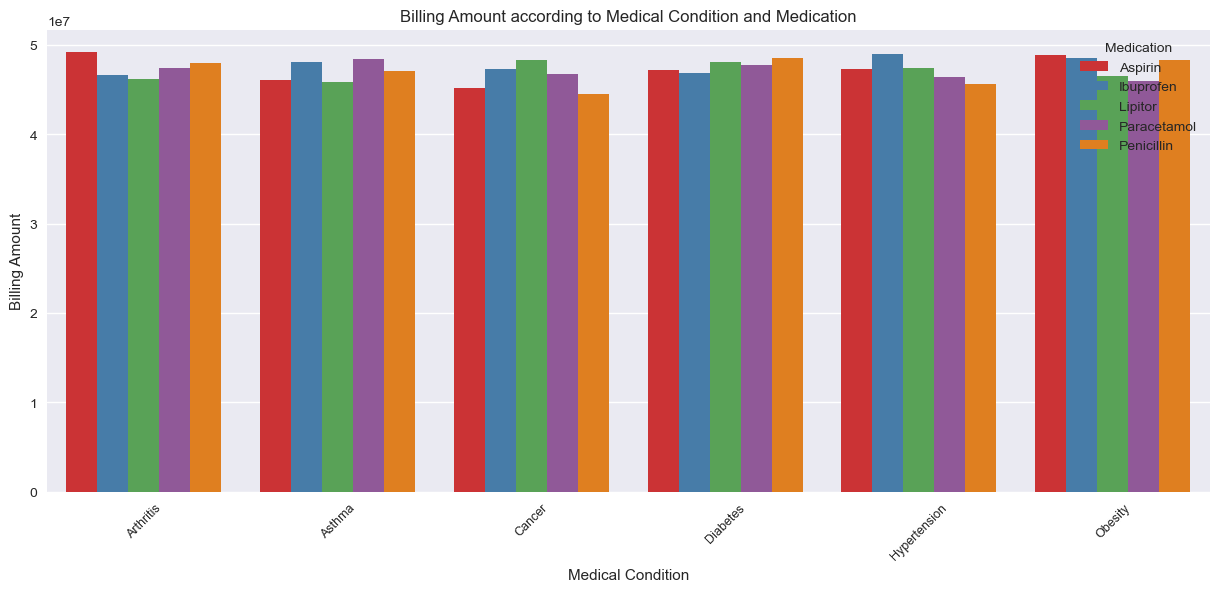

In [38]:
# Billing Amount according to Medical Condition and Medication
df_trans = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Medication'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Medication")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

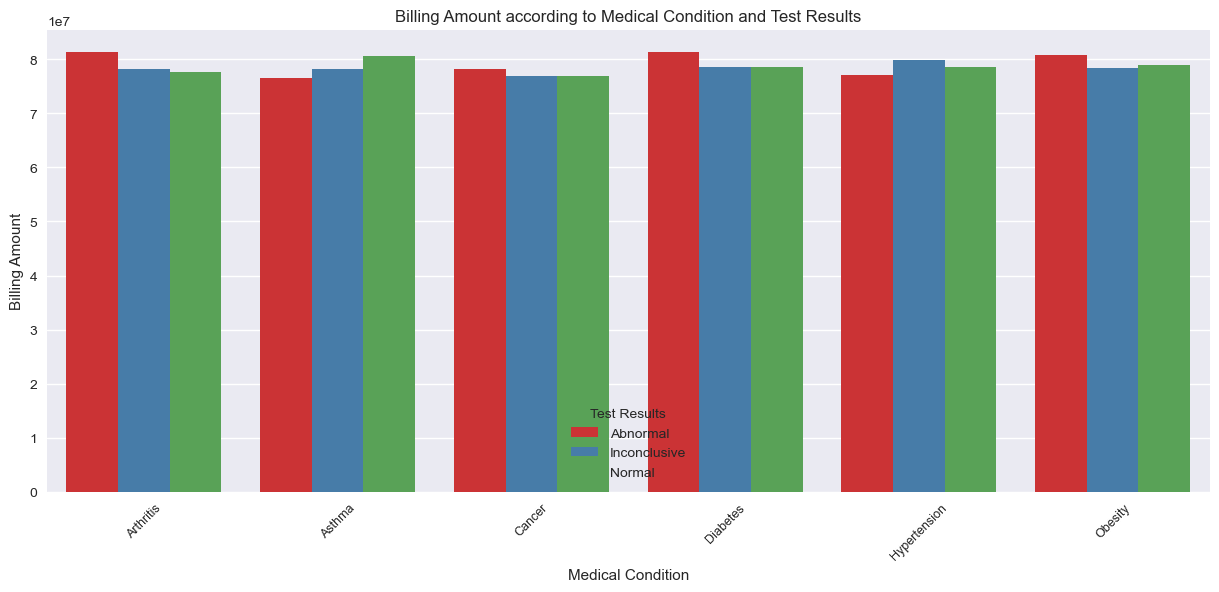

In [39]:
# Billing Amount according to Medical Condition and Test Results
df_trans = df.groupby(['Medical Condition', 'Test Results'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Test Results'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Test Results")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

In [40]:
# Let's create a column with the number of days hospitalized

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Calculate the timedelta in seconds
df['Days hospitalized'] = df['Discharge Date'] - df['Date of Admission']

# Convert timedelta to total seconds and then divide by seconds in a day
df['Days hospitalized'] = df['Days hospitalized'].dt.total_seconds() / (60 * 60 * 24)

# Convert to integer (optional)
df['Days hospitalized'] = df['Days hospitalized'].astype(int)

df.head()


Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306          328         Urgent     2024-02-02  Paracetamol   
1    33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2    27955.096079          205      Emergency     2022-10-07      Aspirin   
3    37909.782410          450       Elective     2020-12-18    Ibuprofen   
4    14238.317814          458         Urgent     2022-10-09   Penicillin   

   Test Results Age_Group  Days hospitalized  
0        Normal     31-40                  2  
1  Inconclusive     61-70                  6  
2        Normal     71-80                 15  
3      Abnormal     18-30                 30  
4      Abnormal     41-50                 20

In [41]:
# Highest 'Features' according to average number of days hospitalized

for i in cols:
    
    if i == 'Gender':

        char_bar = df.groupby(['Gender'])[['Days hospitalized']].mean().reset_index()
        char_bar = char_bar.sort_values(by=("Days hospitalized"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Gender'], y=top["Days hospitalized"]))

        fig.update_layout(title='Highest Gender according to average number of days hospitalized',
                          xaxis_title='Gender',
                          yaxis_title= "Days hospitalized",
                          plot_bgcolor='black', 
                          paper_bgcolor='gray',  
                          font=dict(color='white'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

    else:
        char_bar = df.groupby([i])[['Days hospitalized']].mean().reset_index()
        char_bar = char_bar.sort_values(by=("Days hospitalized"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top['Days hospitalized']))

        fig.update_layout(title="Highest " + i + " according to average number of days hospitalized",
                          xaxis_title= i,
                          yaxis_title= "Days hospitalized",
                          plot_bgcolor='black', 
                          paper_bgcolor='gray',  
                          font=dict(color='white'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

In [42]:
# Assuming 'Paid Amount' represents payment amount
average_payment = df['Billing Amount'].mean()
print(f"Average Payment Amount: ${average_payment:.2f}")

# Group and calculate average payment by specific factors (e.g., insurance provider)
average_payment_grouped = df.groupby('Insurance Provider')['Billing Amount'].mean()
print(average_payment_grouped)


Average Payment Amount: $25539.32
Insurance Provider
Aetna               25553.294506
Blue Cross          25613.011503
Cigna               25525.766314
Medicare            25615.990508
UnitedHealthcare    25389.172390
Name: Billing Amount, dtype: float64


In [43]:
# Calculate monthly admissions
monthly_admissions = df['Date of Admission'].dt.month.value_counts().sort_index()

# Create a DataFrame
monthly_admissions_df = pd.DataFrame({'Month': monthly_admissions.index, 'Admissions': monthly_admissions.values})

# Plot the trend using Plotly Express
fig = px.line(monthly_admissions_df, x='Month', y='Admissions', title='Monthly Admissions Trend')
fig.update_xaxes(title='Month')
fig.update_yaxes(title='Number of Admissions')
fig.show()

# Conclusion